In [1]:
import sys
import datetime
import pandas as pd

sys.path.append('../../')
from src.util.functions import Functions
from src.visualize.visualizer import BarPlot
# Disable warning
pd.options.mode.chained_assignment = None 

level = 'regioni'
region_name = "veneto"

path_data = '../../data'
path_img_root =  '{path_data}/imgs/grafici/{level}/{region}'.format(path_data=path_data, level=level, region=region_name)
path_csv = '{path_data}/csv'.format(path_data=path_data)
csv_in_name = '{path_csv}/{level}/covid19-{region_name}.csv'.format(path_csv=path_csv, level=level, region_name=region_name)

In [2]:
df_raw = pd.read_csv(csv_in_name)
df_raw

,data,codice_regione,denominazione_regione,ricoverati_con_sintomi,terapia_intensiva,totale_ospedalizzati,isolamento_domiciliare,totale_positivi,variazione_totale_positivi,nuovi_positivi,...,nuovi_deceduti,nuovi_tamponi,nuovi_casi_testati,variazione_isolamento_domiciliare,ti_su_to,to_su_tp,np_su_nt,np_su_nct,var_ti_perc,var_pos_perc
0,2020-02-25T18:00:00,5,Veneto,12,7,19,23,42,10,10,...,0.0,1580.0,0.0,7.0,36.84,45.24,0.63,0.00,75.00,31.250
1,2020-02-26T18:00:00,5,Veneto,16,8,24,45,69,27,28,...,1.0,1120.0,0.0,22.0,33.33,34.78,2.50,0.00,14.29,66.667
2,2020-02-27T18:00:00,5,Veneto,19,8,27,82,109,40,40,...,0.0,1264.0,0.0,37.0,29.63,24.77,3.16,0.00,0.00,57.971
3,2020-02-28T18:00:00,5,Veneto,24,9,33,116,149,40,40,...,0.0,1250.0,0.0,34.0,27.27,22.15,3.20,0.00,12.50,36.697
4,2020-02-29T17:00:00,5,Veneto,24,11,35,154,189,40,40,...,0.0,1245.0,0.0,38.0,31.43,18.52,3.21,0.00,22.22,26.846
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
263,2020-11-14T17:00:00,5,Veneto,1869,228,2097,57608,59705,2417,3578,...,52.0,18404.0,6279.0,2370.0,10.87,3.51,19.44,56.98,4.11,6.246
264,2020-11-15T17:00:00,5,Veneto,1934,241,2175,59331,61506,1801,2792,...,29.0,15122.0,5036.0,1723.0,11.08,3.54,18.46,55.44,5.70,4.676
265,2020-11-16T17:00:00,5,Veneto,1985,252,2237,60461,62698,1192,1966,...,22.0,9357.0,3542.0,1130.0,11.27,3.57,21.01,55.51,4.56,3.196
266,2020-11-17T17:00:00,5,Veneto,1980,266,2246,60825,63071,373,3124,...,100.0,18539.0,7392.0,364.0,11.84,3.56,16.85,42.26,5.56,4.983


In [3]:
last_date = datetime.datetime.fromisoformat(df_raw.tail(1).data.array[0])
last_date

datetime.datetime(2020, 11, 18, 17, 0)

In [4]:
# Print stats
# df_n[-2:].iloc[:, 1:]
df_last = df_raw[-1:]
print('Nuovi positivi:', df_last['nuovi_positivi'].item())
print('Nuovi tamponi:', df_last['nuovi_tamponi'].item())
print('Percentuale nuovi positivi/nuovi tamponi:', round(df_last['nuovi_positivi'].item()/df_last['nuovi_tamponi'].item(), 3) * 100, '%')
print('Nuovi guariti:', df_last['nuovi_dimessi_guariti'].item())
print('Nuovi deceduti:', df_last['nuovi_deceduti'].item())
print('Variazione positivi ricoverati con sintomi:', df_last['variazione_ricoverati_con_sintomi'].item())
print('Variazione positivi in terapia intensiva:', df_last['variazione_terapia_intensiva'].item())
print('Variazione positivi in isolamento dimiciliare:', df_last['variazione_isolamento_domiciliare'].item())

Nuovi positivi: 2972
Nuovi tamponi: 16921.0
Percentuale nuovi positivi/nuovi tamponi: 17.599999999999998 %
Nuovi guariti: 1685.0
Nuovi deceduti: 52.0
Variazione positivi ricoverati con sintomi: 99.0
Variazione positivi in terapia intensiva: 8.0
Variazione positivi in isolamento dimiciliare: 1128.0


In [5]:
last_date = datetime.datetime.fromisoformat(df_raw.tail(1).data.array[0])
last_date

datetime.datetime(2020, 11, 18, 17, 0)

In [6]:
# TODO: define function
days = 60
path_img = '{path_img_root}/{days}gg'.format(path_img_root=path_img_root, days=days)
date_threshold = Functions.get_prev_days_date(last_date, days).toordinal()
date_threshold_str = datetime.datetime.fromordinal(date_threshold).isoformat()
date_threshold_str
df = df_raw[df_raw.data > date_threshold_str].reset_index(drop=True)
df

,data,codice_regione,denominazione_regione,ricoverati_con_sintomi,terapia_intensiva,totale_ospedalizzati,isolamento_domiciliare,totale_positivi,variazione_totale_positivi,nuovi_positivi,...,nuovi_deceduti,nuovi_tamponi,nuovi_casi_testati,variazione_isolamento_domiciliare,ti_su_to,to_su_tp,np_su_nt,np_su_nct,var_ti_perc,var_pos_perc
0,2020-09-19T17:00:00,5,Veneto,125,10,135,2910,3045,36,186,...,5.0,16684.0,5788.0,24.0,7.41,4.43,1.11,3.21,25.00,6.181
1,2020-09-20T17:00:00,5,Veneto,124,10,134,2959,3093,48,173,...,4.0,10952.0,3989.0,49.0,7.46,4.33,1.58,4.34,0.00,5.681
2,2020-09-21T17:00:00,5,Veneto,129,12,141,2993,3134,41,103,...,0.0,6595.0,1988.0,34.0,8.51,4.50,1.56,5.18,20.00,3.330
3,2020-09-22T17:00:00,5,Veneto,141,14,155,2988,3143,9,119,...,3.0,10035.0,3789.0,-5.0,9.03,4.93,1.19,3.14,16.67,3.797
4,2020-09-23T17:00:00,5,Veneto,139,16,155,3000,3155,12,150,...,2.0,11967.0,4642.0,12.0,10.32,4.91,1.25,3.23,14.29,4.773
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56,2020-11-14T17:00:00,5,Veneto,1869,228,2097,57608,59705,2417,3578,...,52.0,18404.0,6279.0,2370.0,10.87,3.51,19.44,56.98,4.11,6.246
57,2020-11-15T17:00:00,5,Veneto,1934,241,2175,59331,61506,1801,2792,...,29.0,15122.0,5036.0,1723.0,11.08,3.54,18.46,55.44,5.70,4.676
58,2020-11-16T17:00:00,5,Veneto,1985,252,2237,60461,62698,1192,1966,...,22.0,9357.0,3542.0,1130.0,11.27,3.57,21.01,55.51,4.56,3.196
59,2020-11-17T17:00:00,5,Veneto,1980,266,2246,60825,63071,373,3124,...,100.0,18539.0,7392.0,364.0,11.84,3.56,16.85,42.26,5.56,4.983


In [7]:
# Define figures properties
graph_prop = {'path_root': path_img,
              'label_font': 14,
              'data': {'label': 'Data', 'ticks': lambda x: x.split('T')[0]},
              'nuovi_positivi': {'label': 'Nuovi positivi', 'file_name': 'nuovi_positivi'},
              'np_su_nt': {'label': 'Nuovi positivi / Nuovi tamponi (%)', 'file_name': 'nuovi_positivi_su_nuovi_tamponi'},
              'np_su_nct': {'label': 'Nuovi positivi / Nuovi casi testati (%)', 'file_name': 'nuovi_positivi_su_nuovi_casi_testati'},
              'totale_positivi': {'label': 'Totale positivi', 'file_name': 'totale_positivi'},
              'var_pos_perc': {'label': 'Variazione totale positivi (%)', 'file_name': 'variazione_totale_positivi_perc'},
              'terapia_intensiva': {'label': 'Terapia intensiva', 'file_name': 'terapia_intensiva'},
              'var_ti_perc': {'label': 'Variazione terapia intensiva (%)', 'file_name': 'variazione_terapia_intensiva_perc'},
              'ti_su_to': {'label': 'Terapia intensiva / Totale ospedalizzati (%)', 'file_name': 'terapia_intensiva_su_totale_ospedalizzati'},
              'saturazione_terapia_intensiva': {'label': 'Saturazione terapia intensiva (%)', 'file_name': 'saturazione_terapia_intensiva'},
              'totale_ospedalizzati': {'label': 'Totale ospedalizzati', 'file_name': 'totale_ospedalizzati'},
              'to_su_tp': {'label': 'Totale ospedalizzati / Totale positivi (%)', 'file_name': 'totale_ospedalizzati_su_totale_positivi'},
              'nuovi_deceduti': {'label': 'Nuovi deceduti', 'file_name': 'nuovi_deceduti'},
              'nuovi_dimessi_guariti': {'label': 'Nuovi dimessi guariti', 'file_name': 'nuovi_dimessi_guariti'}}

# Create BarPlot object
bp = BarPlot(df, 'data', graph_prop)

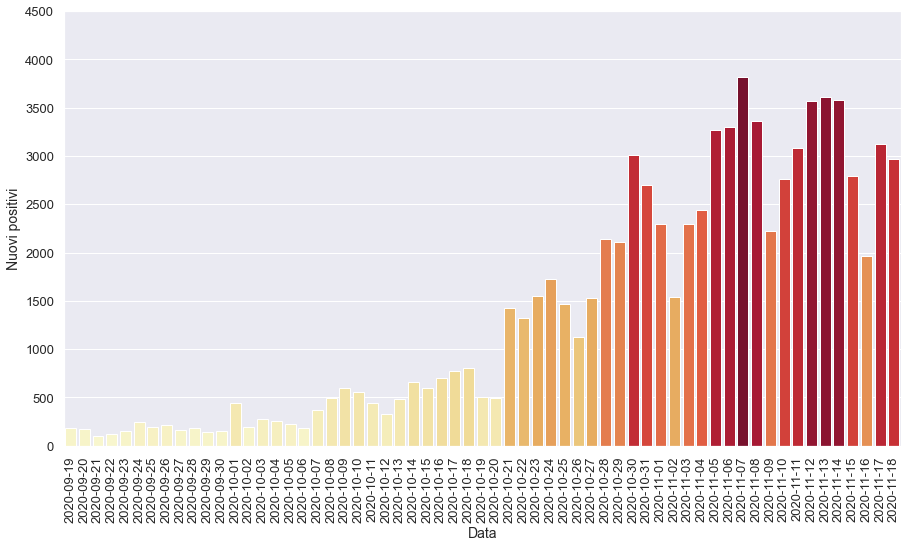

In [8]:
# New positives on new swabs in the last 60 days
y_col = 'nuovi_positivi'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

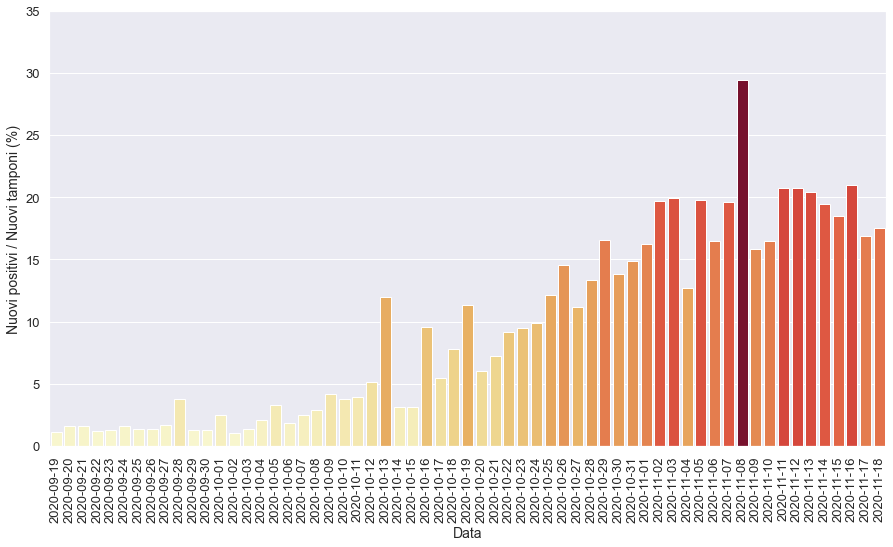

In [9]:
# New positives on new swabs in the last 60 days
y_col = 'np_su_nt'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

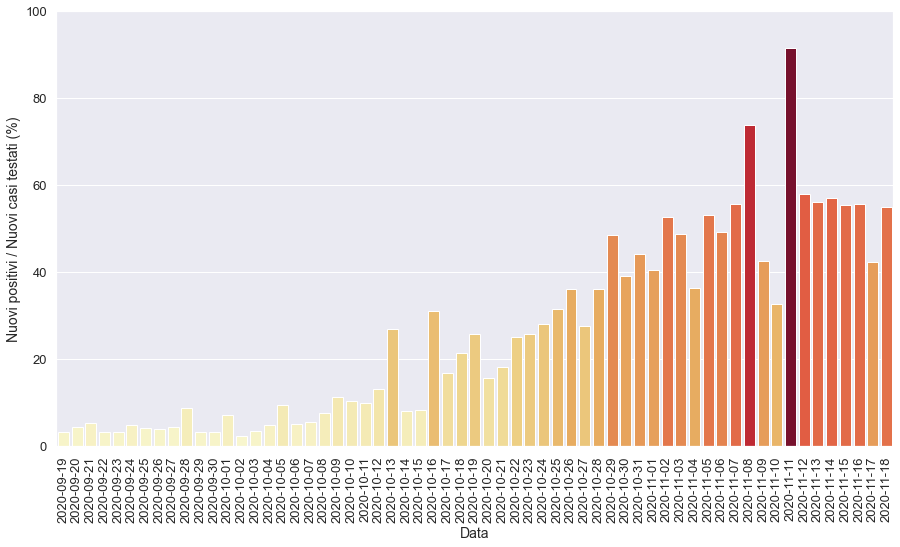

In [10]:
# New positives on new tested cases in the last 60 days
y_col = 'np_su_nct'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

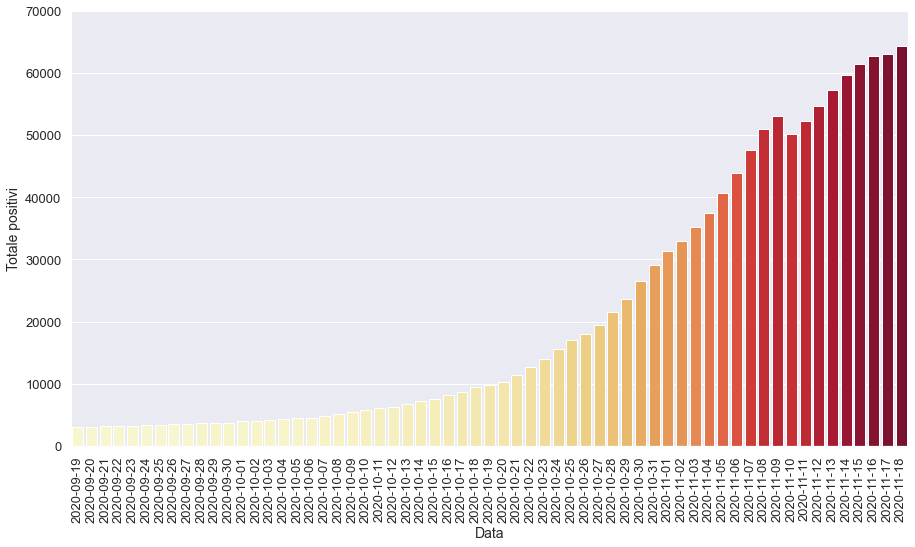

In [11]:
# Percentage of variation of positives in the last 60 days
y_col = 'totale_positivi'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

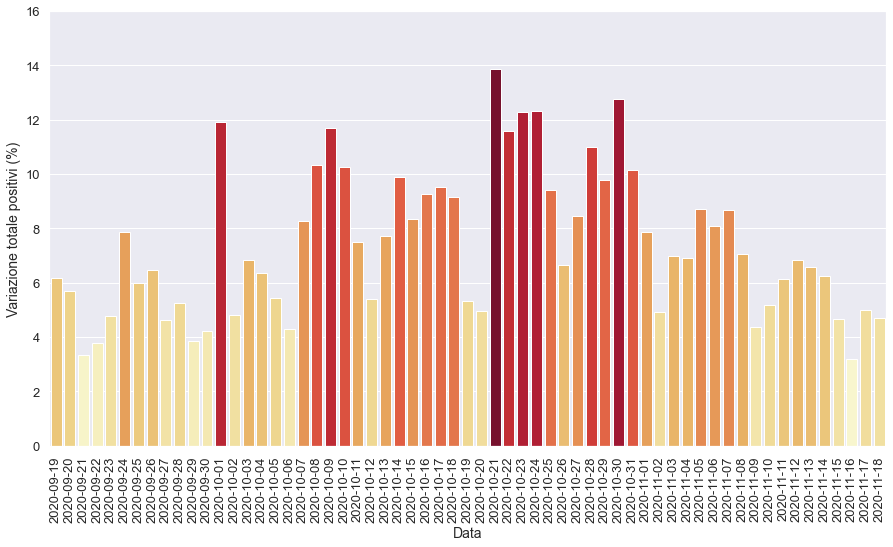

In [12]:
# Percentage of variation of total positives in the last 60 days
y_col = 'var_pos_perc'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

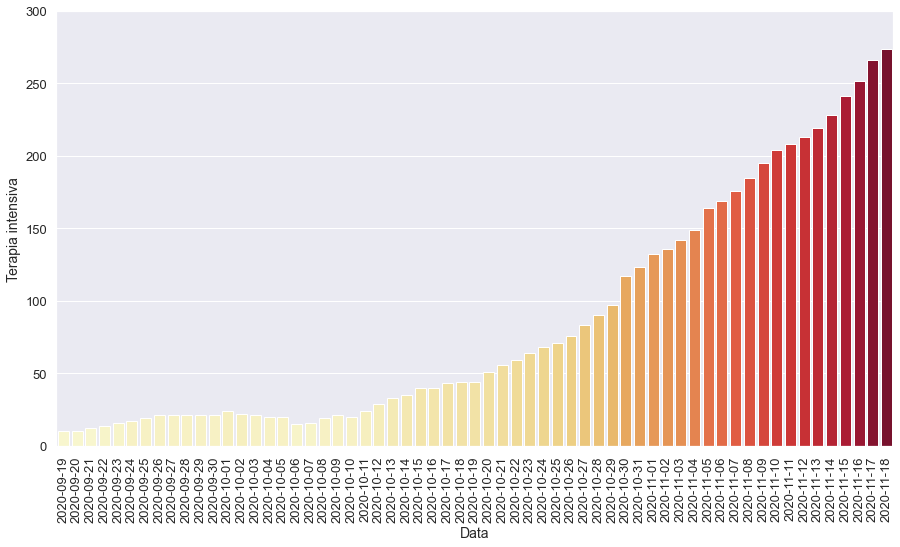

In [13]:
# Positives in ICU in the last 60 days
y_col = 'terapia_intensiva'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

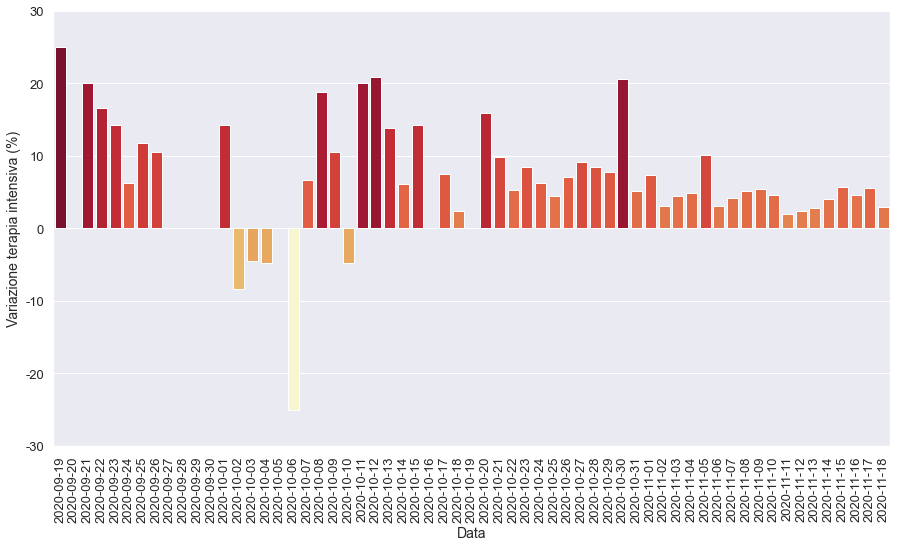

In [14]:
# Percentage of variation of positives in ICU in the last 60 days
y_col = 'var_ti_perc'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

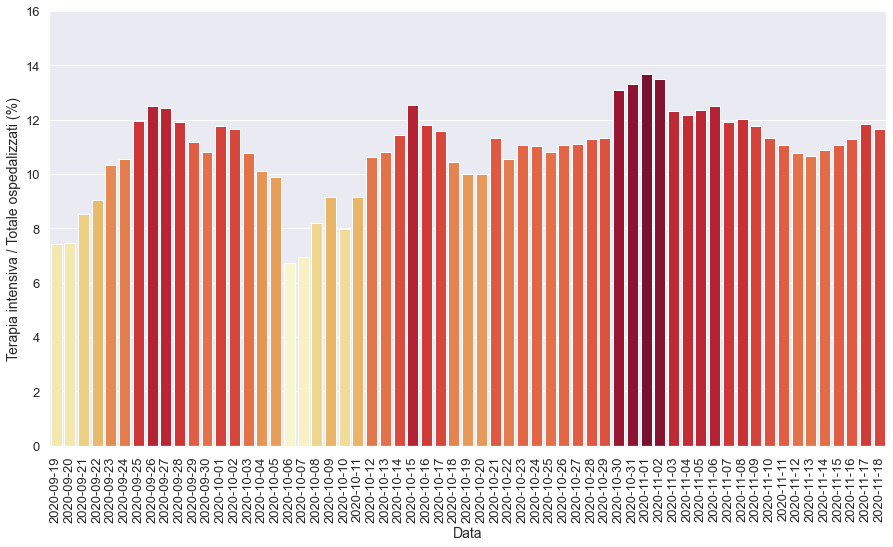

In [15]:
# Positives in ICU in the last 60 days
y_col = 'ti_su_to'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

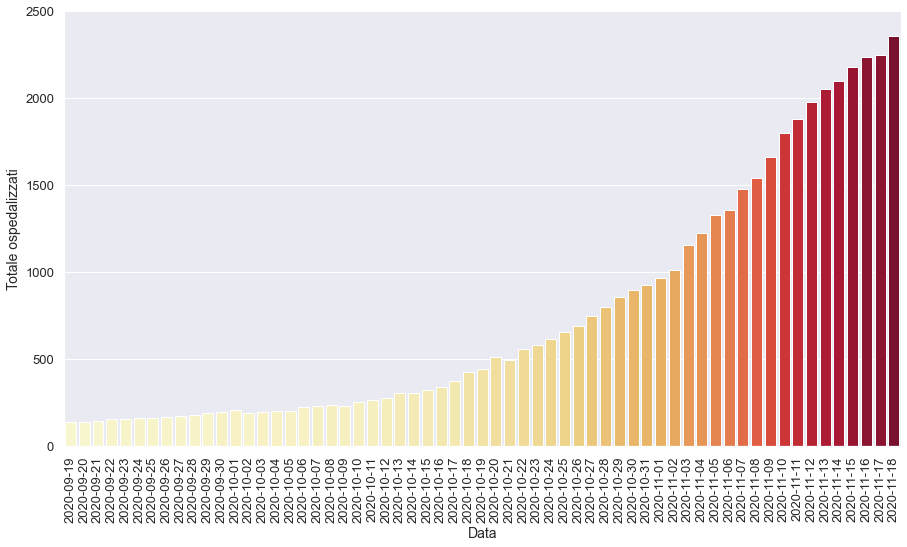

In [16]:
# Hospitalized positives in the last 60 days
y_col = 'totale_ospedalizzati'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

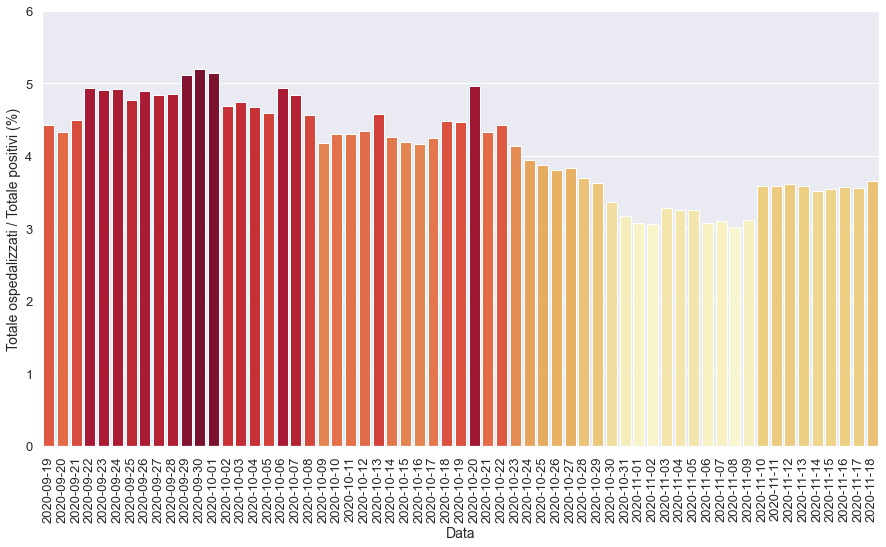

In [17]:
# Hospitalized positives in the last 60 days
y_col = 'to_su_tp'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

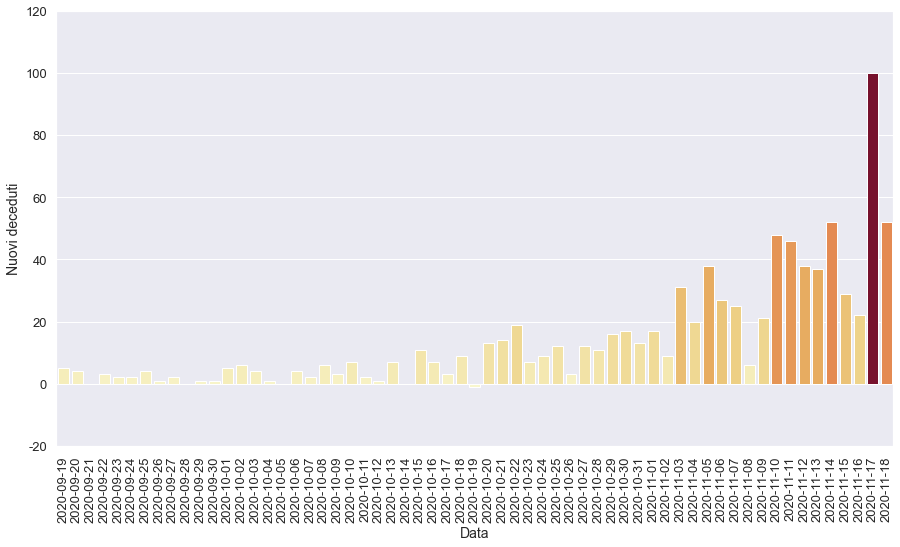

In [18]:
# New deads in the last 60 days
y_col = 'nuovi_deceduti'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

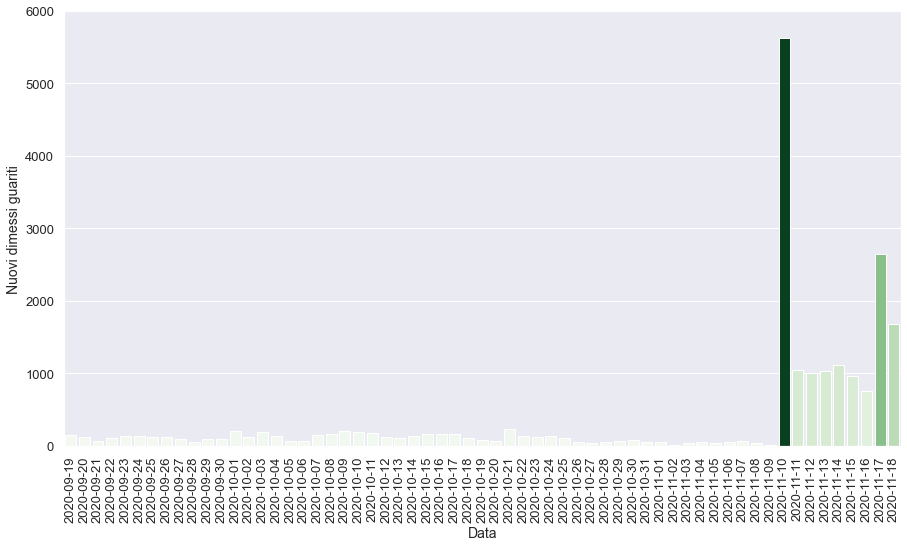

In [19]:
# New healed in the last 60 days
y_col = 'nuovi_dimessi_guariti'
fig = bp.draw_bar_plot(y_col=y_col, color='Greens')
bp.save(fig=fig, y_col=y_col)

In [20]:
# TODO: define function
days = 30
path_img = '{path_img_root}/{days}gg'.format(path_img_root=path_img_root, days=days)
date_threshold = Functions.get_prev_days_date(last_date, days).toordinal()
date_threshold_str = datetime.datetime.fromordinal(date_threshold).isoformat()
date_threshold_str
df = df_raw[df_raw.data > date_threshold_str].reset_index(drop=True)
df;

,data,codice_regione,denominazione_regione,ricoverati_con_sintomi,terapia_intensiva,totale_ospedalizzati,isolamento_domiciliare,totale_positivi,variazione_totale_positivi,nuovi_positivi,...,nuovi_deceduti,nuovi_tamponi,nuovi_casi_testati,variazione_isolamento_domiciliare,ti_su_to,to_su_tp,np_su_nt,np_su_nct,var_ti_perc,var_pos_perc
0,2020-10-19T17:00:00,5,Veneto,396,44,440,9405,9845,420,502,...,-1.0,4426.0,1951.0,402.0,10.00,4.47,11.34,25.73,0.00,5.326
1,2020-10-20T17:00:00,5,Veneto,459,51,510,9746,10256,411,490,...,13.0,8126.0,3157.0,341.0,10.00,4.97,6.03,15.52,15.91,4.977
2,2020-10-21T17:00:00,5,Veneto,439,56,495,10938,11433,1177,1422,...,14.0,19627.0,7837.0,1192.0,11.31,4.33,7.25,18.14,9.80,13.865
3,2020-10-22T17:00:00,5,Veneto,500,59,559,12049,12608,1175,1325,...,19.0,14440.0,5318.0,1111.0,10.55,4.43,9.18,24.92,5.36,11.589
4,2020-10-23T17:00:00,5,Veneto,515,64,579,13455,14034,1426,1550,...,7.0,16277.0,6030.0,1406.0,11.05,4.13,9.52,25.70,8.47,12.294
5,2020-10-24T17:00:00,5,Veneto,548,68,616,15005,15621,1587,1729,...,9.0,17461.0,6174.0,1550.0,11.04,3.94,9.90,28.00,6.25,12.320
6,2020-10-25T17:00:00,5,Veneto,585,71,656,16316,16972,1351,1468,...,12.0,12061.0,4661.0,1311.0,10.82,3.87,12.17,31.50,4.41,9.398
7,2020-10-26T17:00:00,5,Veneto,612,76,688,17359,18047,1075,1129,...,3.0,7745.0,3133.0,1043.0,11.05,3.81,14.58,36.04,7.04,6.652
8,2020-10-27T17:00:00,5,Veneto,664,83,747,18770,19517,1470,1526,...,12.0,13688.0,5523.0,1411.0,11.11,3.83,11.15,27.63,9.21,8.456
9,2020-10-28T17:00:00,5,Veneto,708,90,798,20802,21600,2083,2143,...,11.0,16083.0,5941.0,2032.0,11.28,3.69,13.32,36.07,8.43,10.980


In [21]:
bp.df = df
graph_prop['path_root'] = path_img
bp.graph_prop = graph_prop

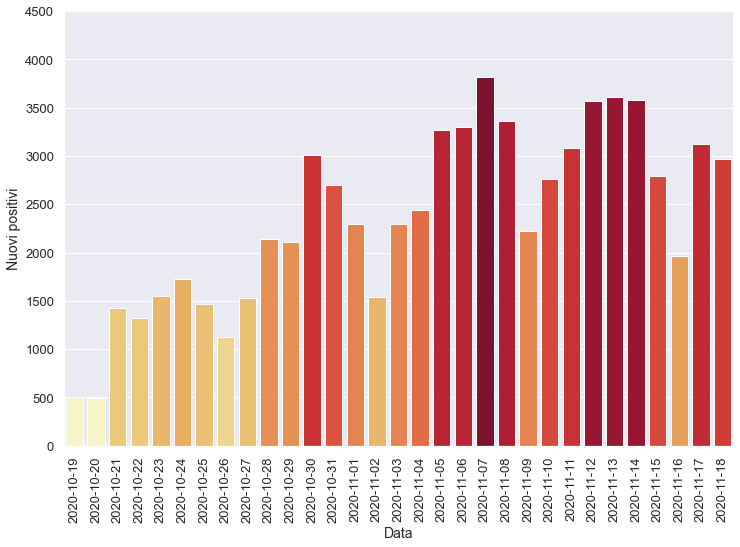

In [22]:
# New positives on new swabs in the last 30 days
y_col = 'nuovi_positivi'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

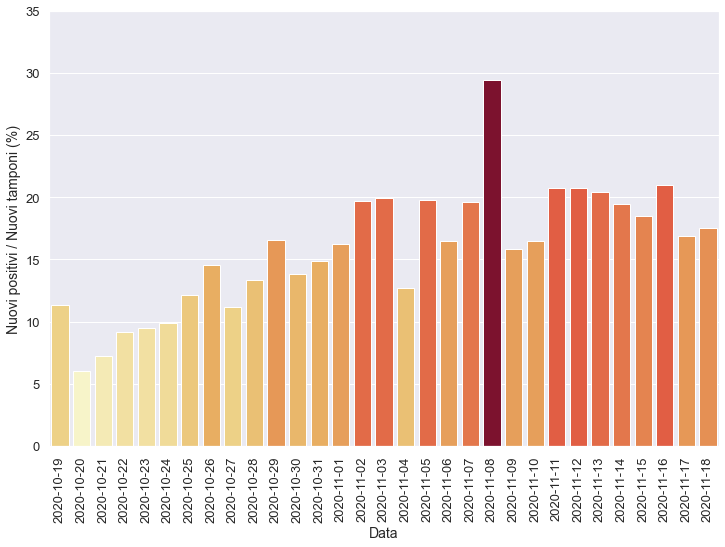

In [23]:
# New positives on new swabs in the last 30 days
y_col = 'np_su_nt'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

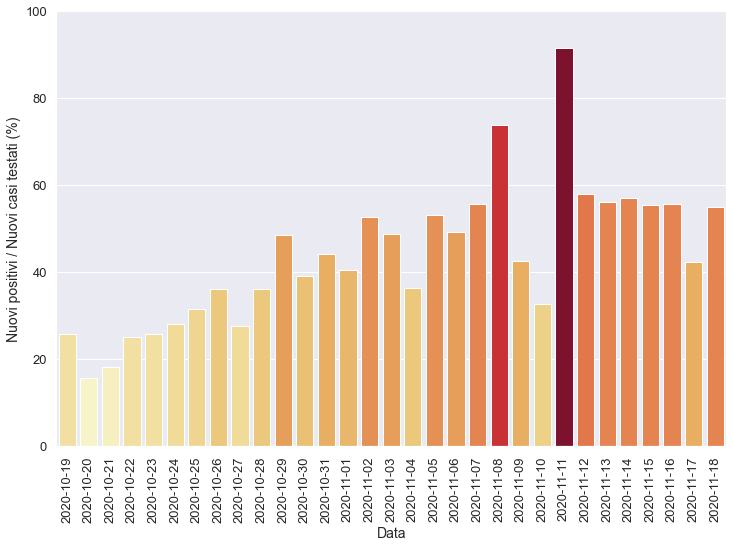

In [24]:
# New positives on new tested cases in the last 30 days
y_col = 'np_su_nct'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

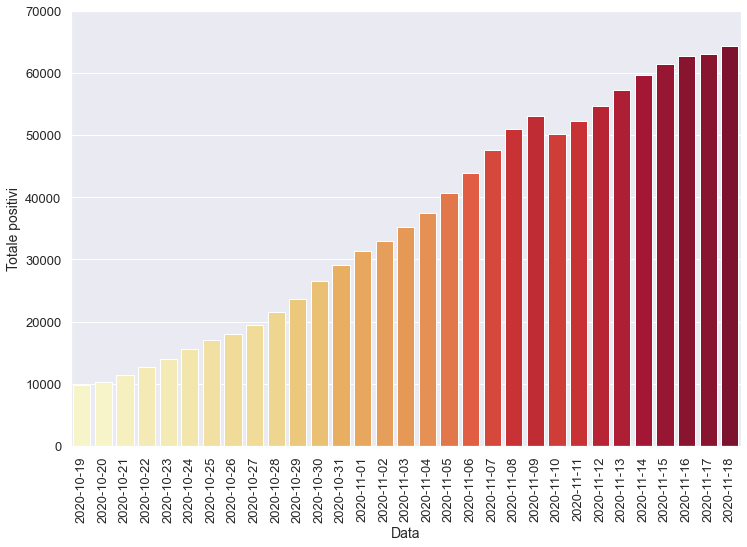

In [25]:
# Number of positives in the last 30 days
y_col = 'totale_positivi'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

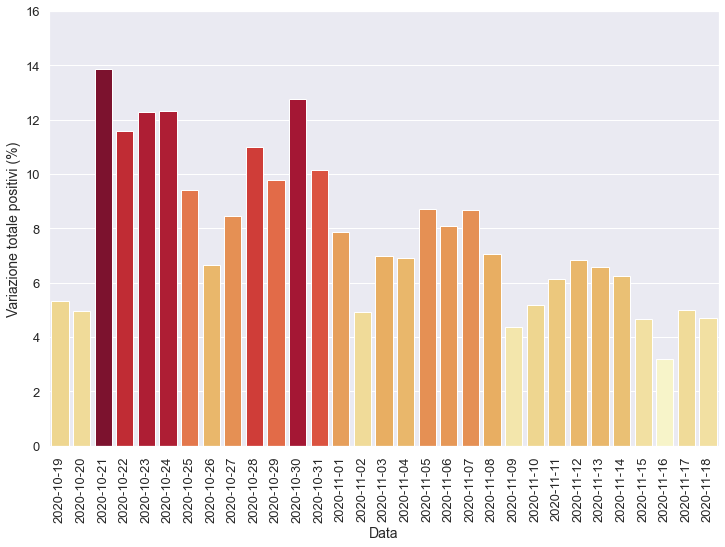

In [26]:
# Percentage of variation of positives in the last 30 days
y_col = 'var_pos_perc'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

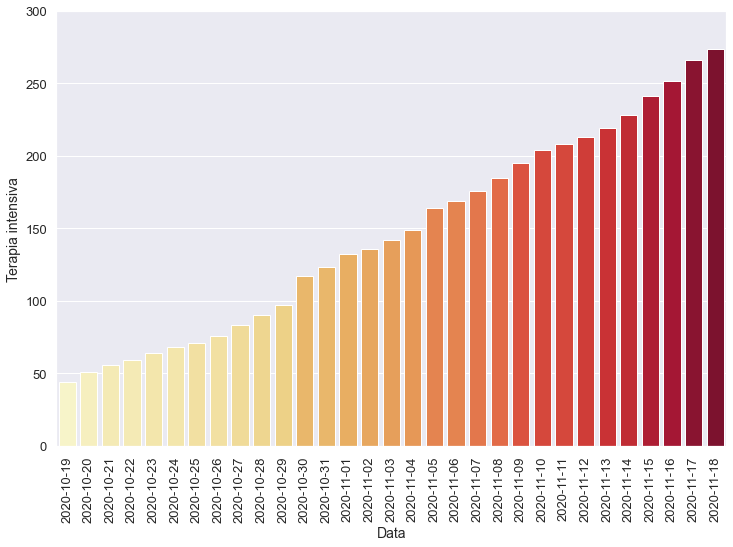

In [27]:
# Positives in ICU in the last 30 days
y_col = 'terapia_intensiva'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

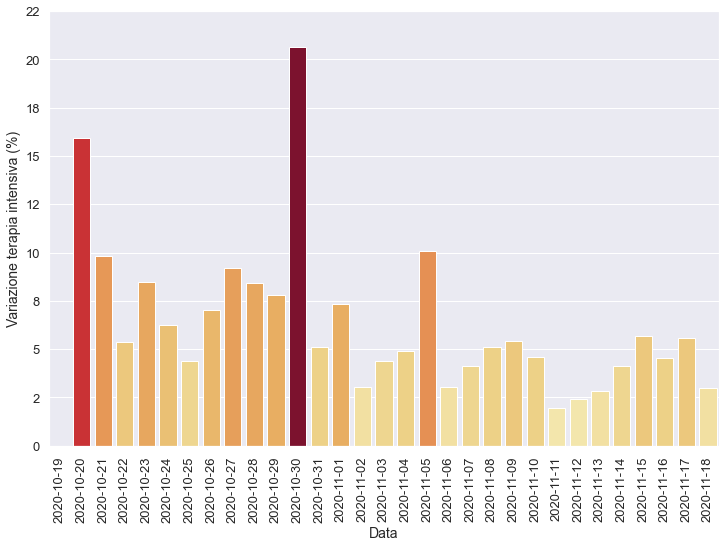

In [28]:
# Percentage of variation of positives in ICU in the last 30 days
y_col = 'var_ti_perc'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

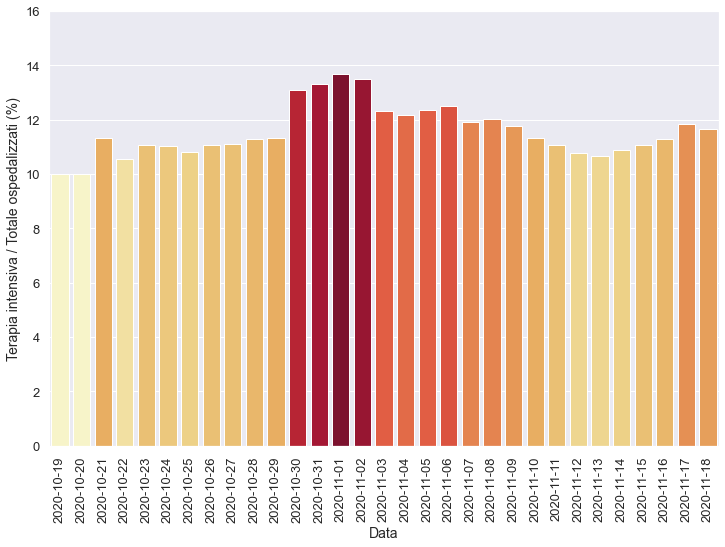

In [29]:
# TODO
y_col = 'ti_su_to'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

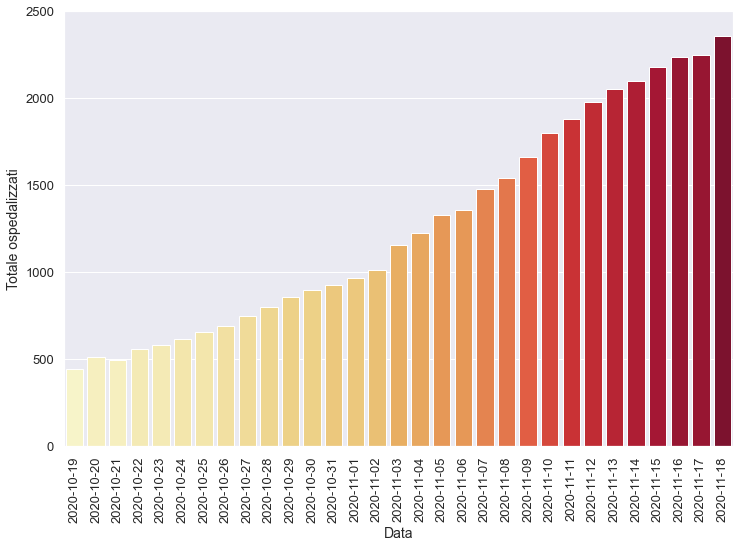

In [30]:
# Hospitalized positives in the last 30 days
y_col = 'totale_ospedalizzati'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

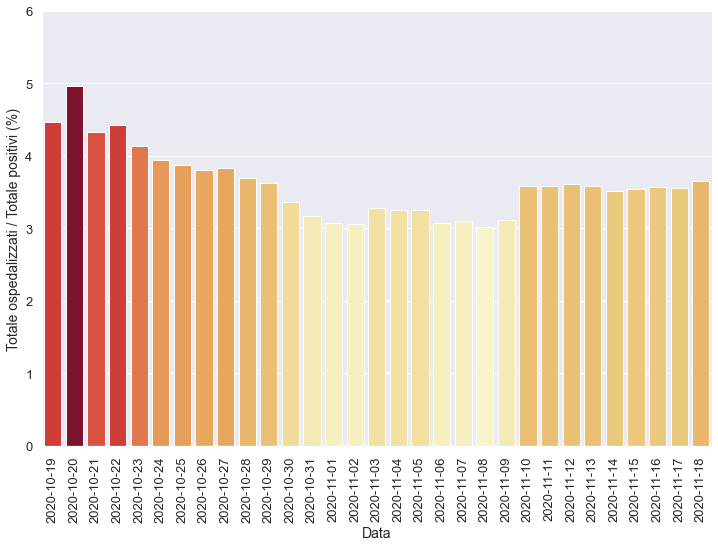

In [31]:
# Hospitalized positives in the last 30 days
y_col = 'to_su_tp'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

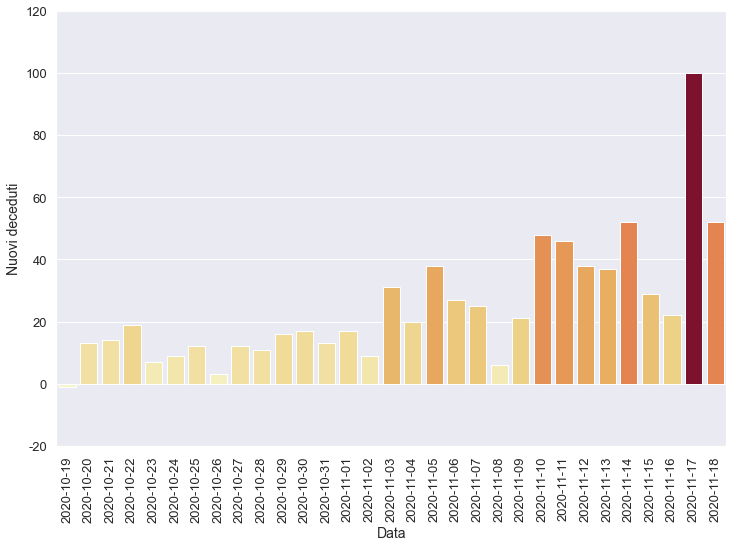

In [32]:
# New deads in the last 30 days
y_col = 'nuovi_deceduti'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

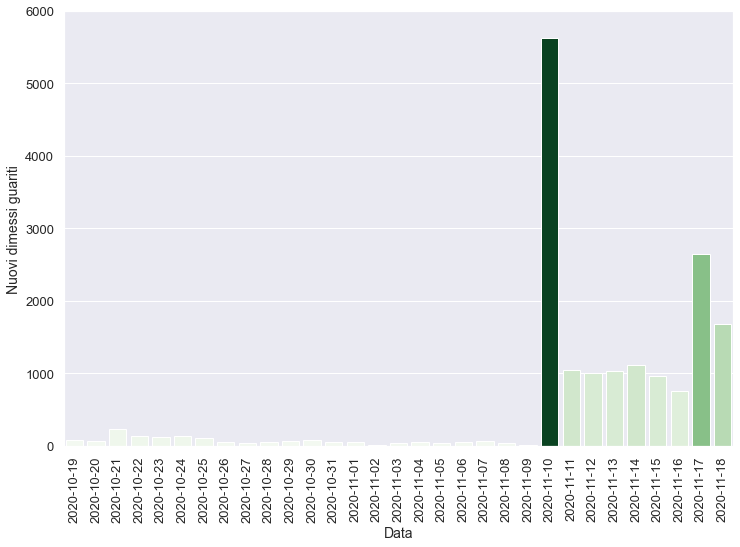

In [33]:
# New healed in the last 30 days
y_col = 'nuovi_dimessi_guariti'
fig = bp.draw_bar_plot(y_col=y_col, color='Greens')
bp.save(fig=fig, y_col=y_col)

In [34]:
# TODO: define function
days = 7
path_img = '{path_img_root}/0{days}gg'.format(path_img_root=path_img_root, days=days)
date_threshold = Functions.get_prev_days_date(last_date, days).toordinal()
date_threshold_str = datetime.datetime.fromordinal(date_threshold).isoformat()
df = df_raw[df_raw.data > date_threshold_str].reset_index(drop=True)
df;

,data,codice_regione,denominazione_regione,ricoverati_con_sintomi,terapia_intensiva,totale_ospedalizzati,isolamento_domiciliare,totale_positivi,variazione_totale_positivi,nuovi_positivi,...,nuovi_deceduti,nuovi_tamponi,nuovi_casi_testati,variazione_isolamento_domiciliare,ti_su_to,to_su_tp,np_su_nt,np_su_nct,var_ti_perc,var_pos_perc
0,2020-11-11T17:00:00,5,Veneto,1669,208,1877,50358,52235,1985,3082,...,46.0,14843.0,3372.0,1908.0,11.08,3.59,20.76,91.40,1.96,6.133
1,2020-11-12T17:00:00,5,Veneto,1763,213,1976,52779,54755,2520,3564,...,38.0,17211.0,6146.0,2421.0,10.78,3.61,20.71,57.99,2.40,6.823
2,2020-11-13T17:00:00,5,Veneto,1831,219,2050,55238,57288,2533,3605,...,37.0,17644.0,6421.0,2459.0,10.68,3.58,20.43,56.14,2.82,6.584
3,2020-11-14T17:00:00,5,Veneto,1869,228,2097,57608,59705,2417,3578,...,52.0,18404.0,6279.0,2370.0,10.87,3.51,19.44,56.98,4.11,6.246
4,2020-11-15T17:00:00,5,Veneto,1934,241,2175,59331,61506,1801,2792,...,29.0,15122.0,5036.0,1723.0,11.08,3.54,18.46,55.44,5.70,4.676
5,2020-11-16T17:00:00,5,Veneto,1985,252,2237,60461,62698,1192,1966,...,22.0,9357.0,3542.0,1130.0,11.27,3.57,21.01,55.51,4.56,3.196
6,2020-11-17T17:00:00,5,Veneto,1980,266,2246,60825,63071,373,3124,...,100.0,18539.0,7392.0,364.0,11.84,3.56,16.85,42.26,5.56,4.983
7,2020-11-18T17:00:00,5,Veneto,2079,274,2353,61953,64306,1235,2972,...,52.0,16921.0,5420.0,1128.0,11.64,3.66,17.56,54.83,3.01,4.712


In [35]:
bp.df = df
graph_prop['path_root'] = path_img
bp.graph_prop = graph_prop

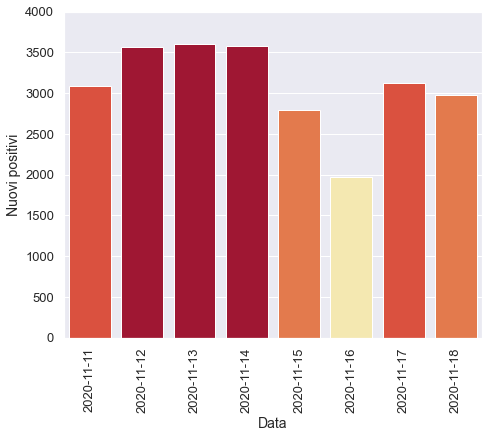

In [36]:
# New positives on new swabs in the last 7 days
y_col = 'nuovi_positivi'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

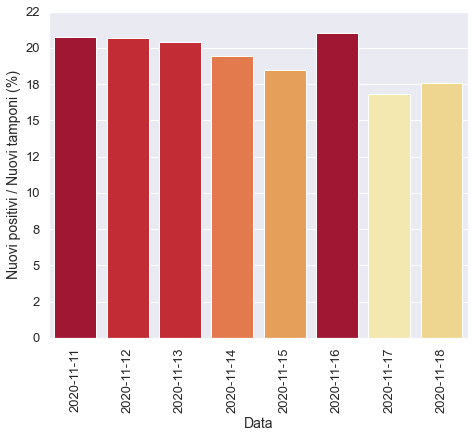

In [37]:
# New positives on new swabs in the last 7 days
y_col = 'np_su_nt'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

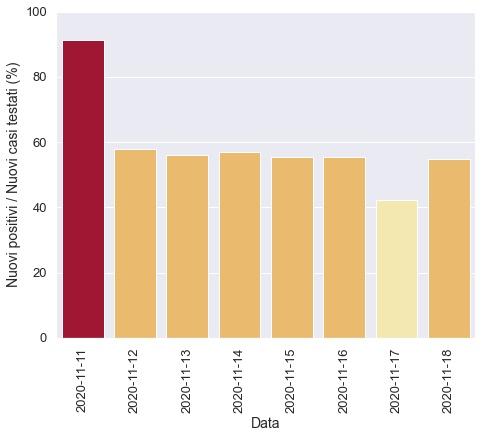

In [38]:
# New positives on new tested cases in the last 7 days
y_col = 'np_su_nct'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

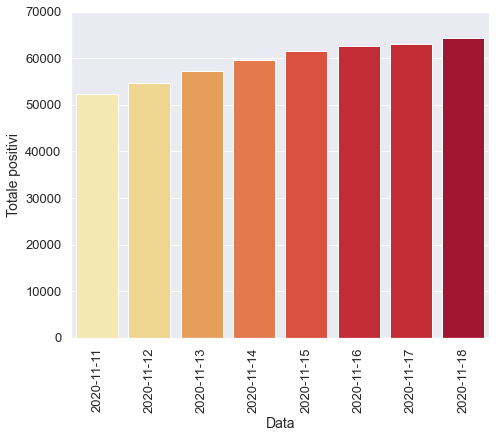

In [39]:
# Percentage of variation of positives in the last 7 days
y_col = 'totale_positivi'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

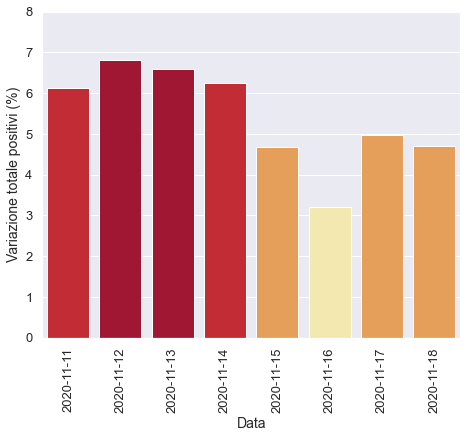

In [40]:
# Percentage of variation of positives in the last 7 days
y_col = 'var_pos_perc'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

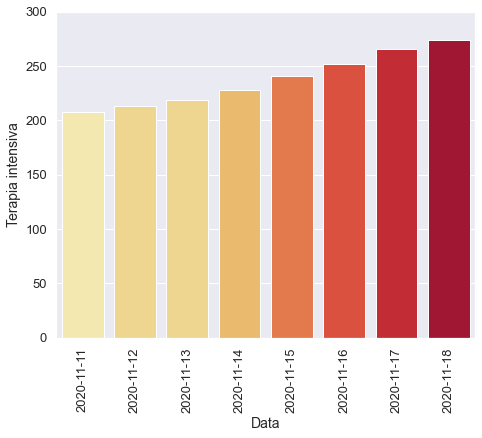

In [41]:
# Positives in ICU in the last 7 days
y_col = 'terapia_intensiva'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

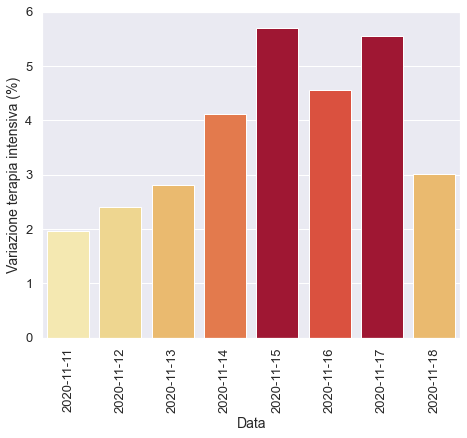

In [42]:
# Percentage of variation of positives in ICU in the last 30 days
y_col = 'var_ti_perc'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

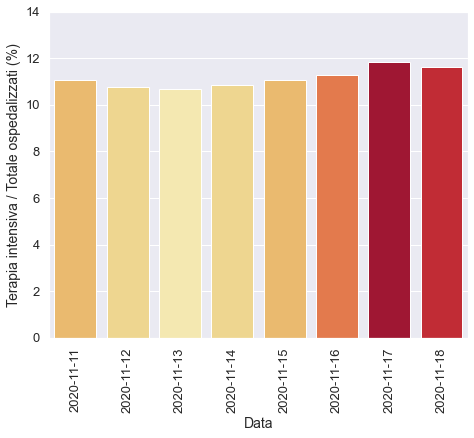

In [43]:
# Positives in ICU in the last 7 days
y_col = 'ti_su_to'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

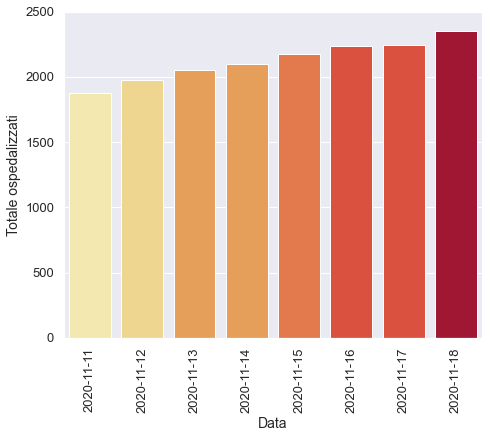

In [44]:
# Hospitalized positives in the last 7 days
y_col = 'totale_ospedalizzati'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

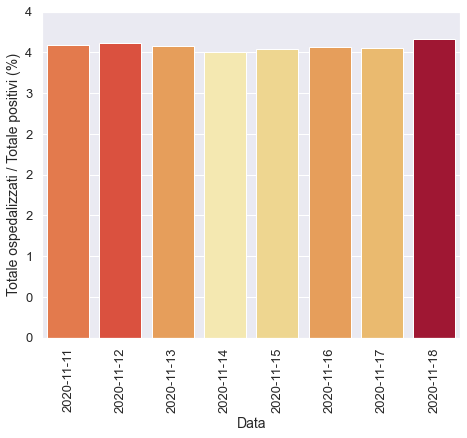

In [45]:
# Hospitalized positives in the last 7 days
y_col = 'to_su_tp'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

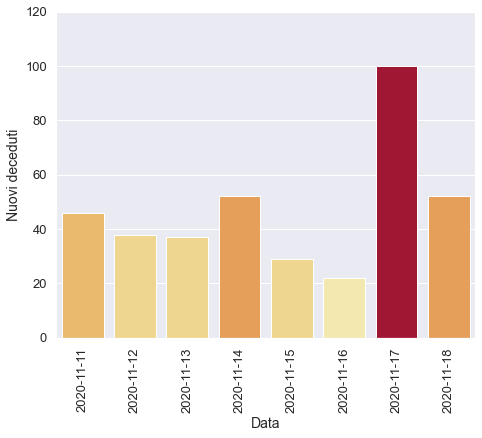

In [46]:
# New deads in the last 7 days
y_col = 'nuovi_deceduti'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

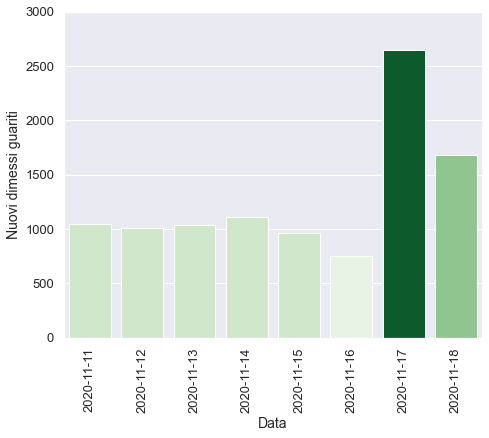

In [47]:
# New healed in the last 7 days
y_col = 'nuovi_dimessi_guariti'
fig = bp.draw_bar_plot(y_col=y_col, color='Greens')
bp.save(fig=fig, y_col=y_col)